In [2]:
import tensorflow as tf
from tensorflow.keras import layers, datasets, models




In [3]:
# Loas the IMDb dataset
(train_data, train_labels), (test_data, test_labels) = datasets.imdb.load_data(num_words=10000)

#PREPROCESSING the data
train_data= tf.keras.preprocessing.sequence.pad_sequences(train_data, value=0, padding='post', maxlen=500)
test_data = tf.keras.preprocessing.sequence.pad_sequences(test_data, value=0, padding='post', maxlen=500)

#define the model
model = models.Sequential()
model.add(layers.Embedding(10000, 16))
model.add(layers.SimpleRNN(32))
model.add(layers.Dense(1, activation='sigmoid'))


#compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#train the model
history = model.fit(train_data, train_labels, epochs=5, batch_size=128, validation_split=0.2)

#evaluate the model
test_loss, test_acc = model.evaluate(test_data, test_labels)
print('Test Accuracy:', test_acc)



17464789/17464789 [==============================] - 5s 0us/step


Epoch 1/5


157/157 [==============================] - 18s 98ms/step - loss: 0.6934 - accuracy: 0.5037 - val_loss: 0.6935 - val_accuracy: 0.5076
Epoch 2/5
157/157 [==============================] - 16s 105ms/step - loss: 0.6861 - accuracy: 0.5250 - val_loss: 0.6964 - val_accuracy: 0.5000
Epoch 3/5
157/157 [==============================] - 13s 82ms/step - loss: 0.6751 - accuracy: 0.5332 - val_loss: 0.6960 - val_accuracy: 0.5040
Epoch 4/5
157/157 [==============================] - 13s 84ms/step - loss: 0.6637 - accuracy: 0.5465 - val_loss: 0.6980 - val_accuracy: 0.5078
Epoch 5/5
782/782 [==============================] - 18s 22ms/step - loss: 0.7024 - accuracy: 0.4994
Test Accuracy: 0.4994400143623352


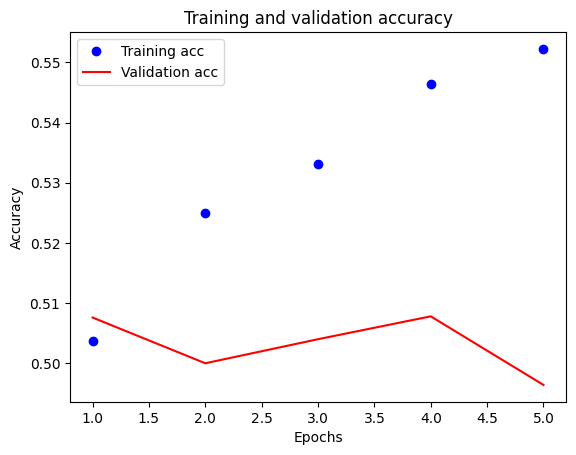

In [5]:
# plot the training and validation accuracy
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')  # Use 'r' for red color
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

